## [KBO 타자 OPS 예측]
## OPS:장타율(타수에서 기대되는 평균 루타)+출루율
#### 1.1 탐색적 데이터 분석

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='Malgun Gothic'

### [제공자료]
### 약350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공된다.
- batter_id: 타자의 고유 아이디
- batter_name: 타자 이름
- year: 년도
- team: 소속팀
- avg: 타율
- G: 출전게임수
- AB: 타수(타석-볼넷-사구-희생번트-희생플라이)
- R: 득점
- H: 안타(1루타+2루타+3루타+홈런)
- 2B: 2루타
- 3B: 3루타
- HR: 홈런
- TB: 루타 수
- RBI: 타점
- SB: 도루 성공
- CS: 도루 실패
- BB: 볼넷
- HBP: 사구(몸에 맞는 볼)
- SO: 삼진아웃
- GDP: 병살타
- SLG: 장타율
- OBP: 출루율
- E: 에러
- height/weight: 선수의 키/몸무게
- year_born: 선수의 생년월일
- position: 선수의 수비위치
- career: 선수의 커리어
- starting_salary: 선수의 한국프로야구 입단연봉
- OPS: OPS(OBP+SLG) 출루율+장타율


### [EDA를 통한 프리시즌 데이터를 예측모델에 사용여부 확인]
- 야구용어 정리
- https://sites.google.com/site/eveningglow17/record/yagu-yong-eo-jeongli

In [84]:
pre_df=pd.read_csv('./Pre_season_Batter.csv')
reg_df=pd.read_csv('./Regular_Season_Batter.csv')
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [78]:
# 프리시즌의 데이터 프리시즌의 기초 통계량 확인(2002~2018까지의 데이터셋을 확인하고자 함)

pre_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


In [85]:
pre_df1.isnull().sum()


batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

In [86]:
reg_df.isnull().sum()

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

<AxesSubplot:>

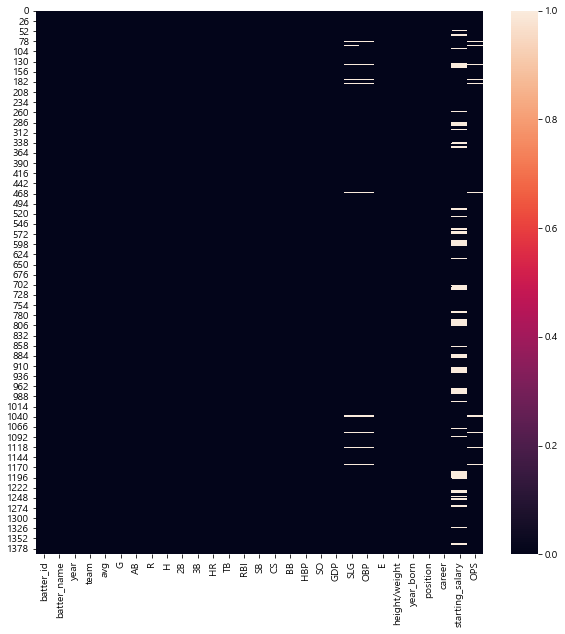

In [75]:
pre_df.isnull().sum()
pre_df=pre_df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(pre_df)

In [87]:
reg_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


### 데이터분포도 확인
- 히스토그램을 이용한다.

------------프리시즌------------


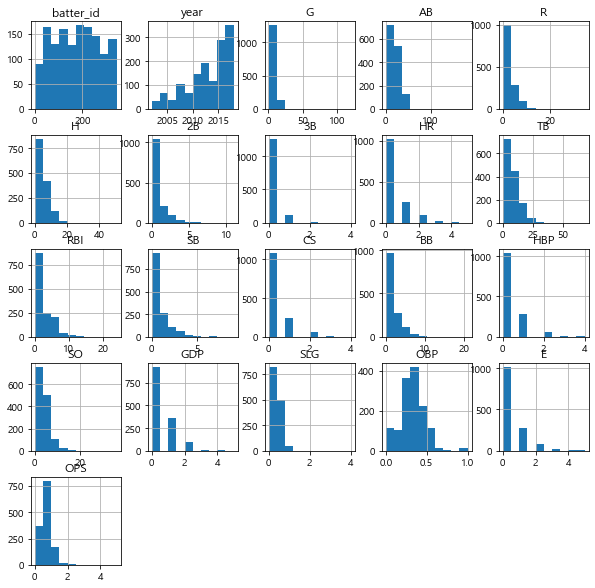

------------정규시즌------------


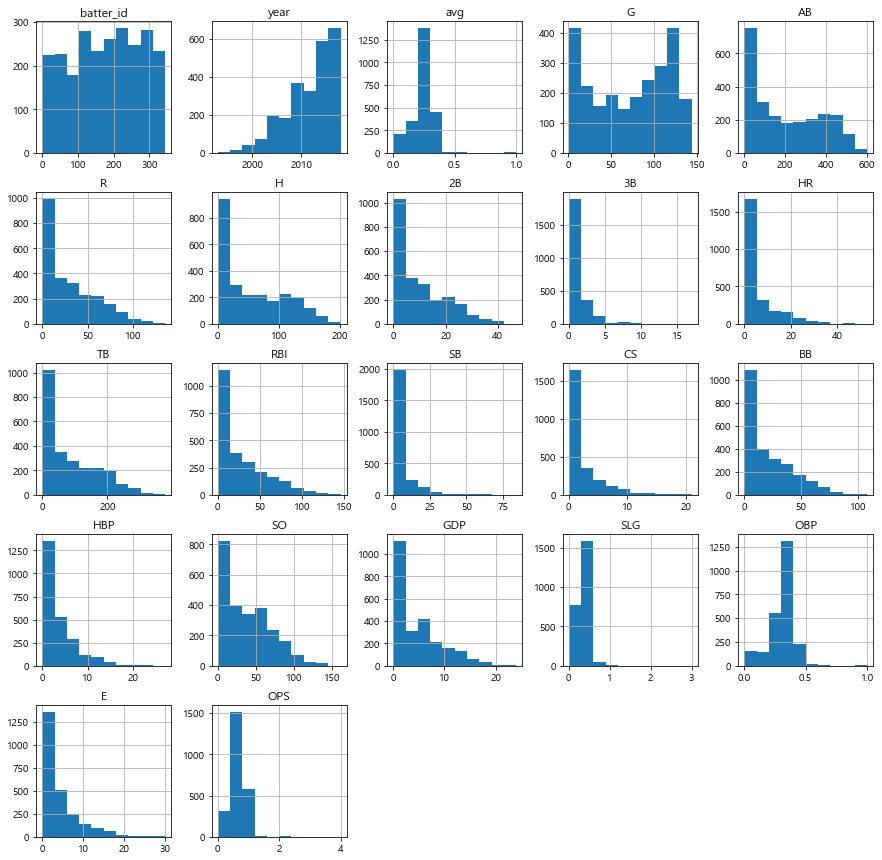

In [70]:
print('------------프리시즌------------')
pre_df.hist(figsize=(10,10))
plt.show()
print('------------정규시즌------------')
pre_df1.hist(figsize=(15,15))
plt.show()
#데이터가 작은쪽에만 몰려있다.(왼쪽으로 치우침)

In [88]:
# [분석2]
# 프리시즌데이터에 있는 선수가 정규시즌 데이터에 있어서 프리시즌이 분석가치가 있는가?
# 그해의 정규시즌의 선수리스트 자료와 프리시즌 선수리스트의 자료의 교집합이 있는가?
# 교집합의 총 인원수를 알려주세요
reYearName=reg_df['year'].apply(str)+reg_df['batter_name']
preYearName=pre_df['year'].apply(str)+pre_df['batter_name']
len(reYearName.unique())

2454

In [90]:
reUnique=pd.DataFrame(reYearName.unique(),columns=['bigo'])
preUnique=pd.DataFrame(preYearName.unique(),columns=['bigo'])

In [102]:
reUnique['join']=1
df=pd.merge(reUnique,preUnique,how='left',left_on='bigo',right_on='bigo')
df

,bigo,join
0,2018가르시아,1
1,2011강경학,1
2,2014강경학,1
3,2015강경학,1
4,2016강경학,1
...,...,...
2449,2014황진수,1
2450,2015황진수,1
2451,2016황진수,1
2452,2017황진수,1


In [104]:
# [분석3]
# 프리시즌의 성적 데이터를 분석데이터에 넣을것인가를 분석 2
# 프리시즌 데이터와 정규시즌 데이터간의 상관도는 있는가?(OPS값이)
# 프리시즌 성적과 정규시즌 성적이 동일한 패턴인가?(OPS값이)

# -전제조건: 분석2의 자료가 분석3까지 들어가야 한다.
# 결과가 0.15가 나오면 맞음(작업), 프리시즌 데이터 안씀
correlation=df.corr(method='pearson')['OPS']
correlation

KeyError: 'OPS'

<AxesSubplot:xlabel='year', ylabel='OPS'>

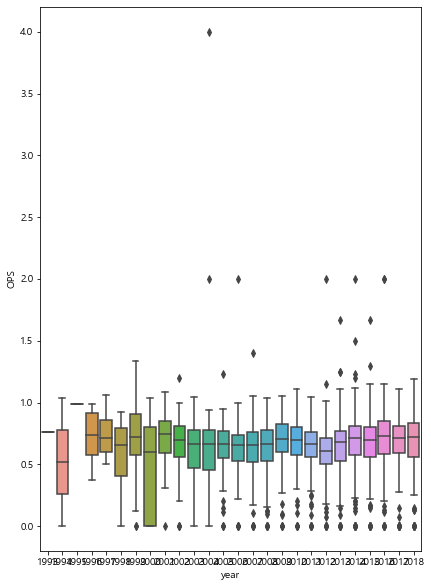

In [112]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='year',y='OPS',data=reg_df)


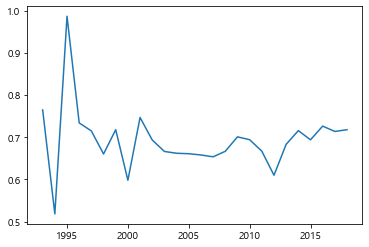

In [111]:
plt.plot(reg_df.groupby('year')['OPS'].median())

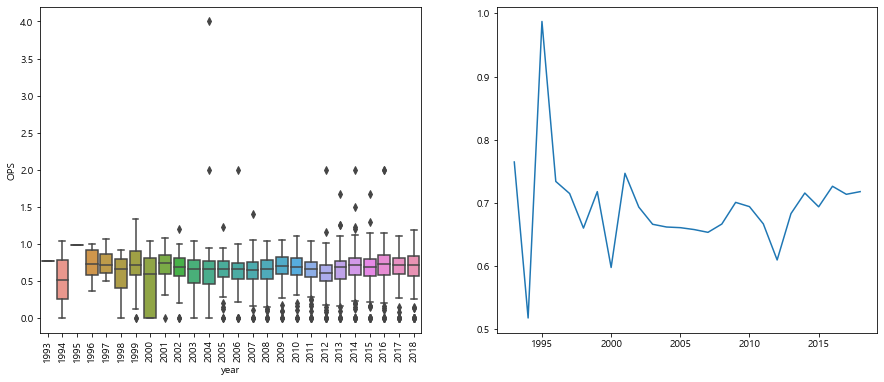

In [113]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
# OPS의 년도별 boxplot
reGraph=sns.boxplot(x='year',y='OPS',data=reg_df)
reGraph.set_xticklabels(reGraph.get_xticklabels(),rotation=90)
# 중앙값을 년도별로 그려봄
plt.subplot(1,2,2)
plt.plot(reg_df.groupby('year')['OPS'].median())
plt.show()
